In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [ ]:
dataset=pd.read_csv("insurance.csv")
print(dataset)
dataset.shape

     age  sex     bmi  children  smoker  region      charges
0     19    0  27.900         0       1       3  16884.92400
1     18    1  33.770         1       0       2   1725.55230
2     28    1  33.000         3       0       2   4449.46200
3     33    1  22.705         0       0       1  21984.47061
4     32    1  28.880         0       0       1   3866.85520
..   ...  ...     ...       ...     ...     ...          ...
343   63    1  36.765         0       0       0  13981.85035
344   49    0  41.470         4       0       2  10977.20630
345   34    0  29.260         3       0       2   6184.29940
346   33    1  35.750         2       0       2   4889.99950
347   46    1  33.345         1       0       0   8334.45755

[348 rows x 7 columns]


(348, 7)

In [ ]:
dataf=pd.DataFrame(dataset)
dataf.describe()#check nature of dataset

age         sex         bmi  ...      smoker      region       charges
count  348.000000  348.000000  348.000000  ...  348.000000  348.000000    348.000000
mean    39.591954    0.508621   30.676552  ...    0.232759    1.497126  14016.426293
std     14.417015    0.500646    5.625850  ...    0.423198    1.104089  12638.887852
min     18.000000    0.000000   15.960000  ...    0.000000    0.000000   1137.011000
25%     27.000000    0.000000   26.782500  ...    0.000000    1.000000   4888.466125
50%     40.000000    1.000000   30.300000  ...    0.000000    2.000000   9719.305250
75%     53.000000    1.000000   34.777500  ...    0.000000    2.000000  19006.316150
max     64.000000    1.000000   49.060000  ...    1.000000    3.000000  51194.559140

[8 rows x 7 columns]

In [ ]:
dataf.dropna()

age  sex     bmi  children  smoker  region      charges
0     19    0  27.900         0       1       3  16884.92400
1     18    1  33.770         1       0       2   1725.55230
2     28    1  33.000         3       0       2   4449.46200
3     33    1  22.705         0       0       1  21984.47061
4     32    1  28.880         0       0       1   3866.85520
..   ...  ...     ...       ...     ...     ...          ...
343   63    1  36.765         0       0       0  13981.85035
344   49    0  41.470         4       0       2  10977.20630
345   34    0  29.260         3       0       2   6184.29940
346   33    1  35.750         2       0       2   4889.99950
347   46    1  33.345         1       0       0   8334.45755

[348 rows x 7 columns]

In [ ]:
#separating x and y
age_val=dataf.iloc[0:dataf.shape[0],0:1]
gen_val=dataf.iloc[0:dataf.shape[0],1:2]
bmi_val=dataf.iloc[0:dataf.shape[0],2:3]
children_val=dataf.iloc[0:dataf.shape[0],3:4]
smoker_val=dataf.iloc[0:dataf.shape[0],4:5]
region_val=dataf.iloc[0:dataf.shape[0],5:6]
charges_val=dataf.iloc[0:dataf.shape[0],6:7]

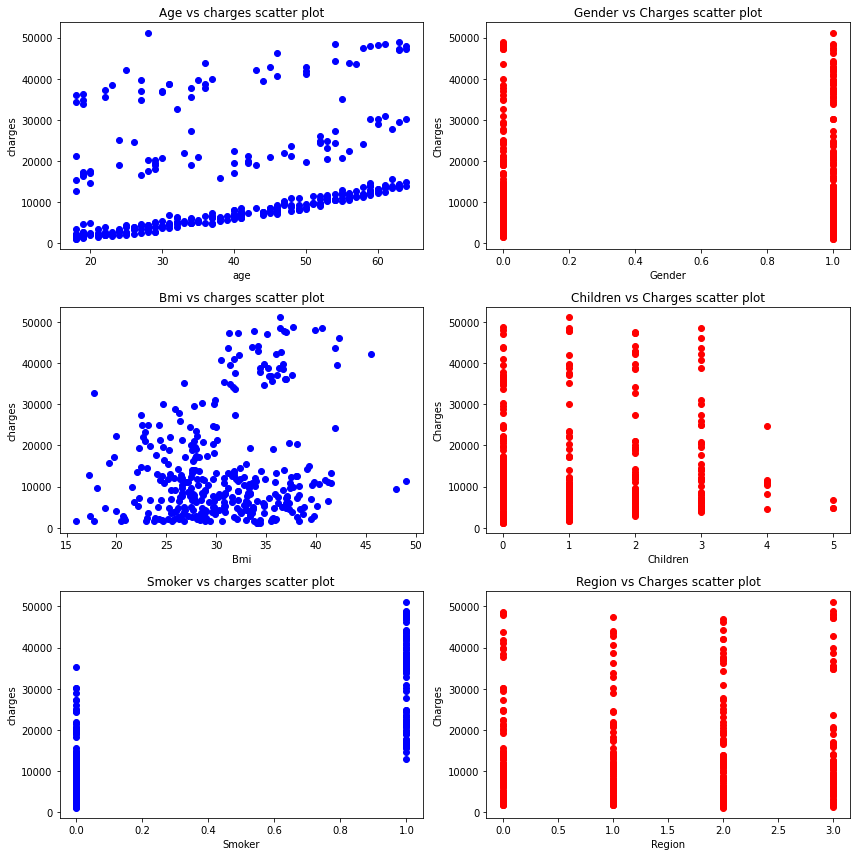

In [ ]:
fig, axes = plt.subplots(figsize=(12,12),nrows=3,ncols=2)

axes[0][0].scatter(age_val,charges_val,color="b")
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("charges")
axes[0][0].set_title("Age vs charges scatter plot")

axes[0][1].scatter(gen_val,charges_val,color="r")
axes[0][1].set_xlabel("Gender")
axes[0][1].set_ylabel("Charges")
axes[0][1].set_title("Gender vs Charges scatter plot")

axes[1][0].scatter(bmi_val,charges_val,color="b")
axes[1][0].set_xlabel("Bmi")
axes[1][0].set_ylabel("charges")
axes[1][0].set_title("Bmi vs charges scatter plot")

axes[1][1].scatter(children_val,charges_val,color="r")
axes[1][1].set_xlabel("Children")
axes[1][1].set_ylabel("Charges")
axes[1][1].set_title("Children vs Charges scatter plot")

axes[2][0].scatter(smoker_val,charges_val,color="b")
axes[2][0].set_xlabel("Smoker")
axes[2][0].set_ylabel("charges")
axes[2][0].set_title("Smoker vs charges scatter plot")

axes[2][1].scatter(region_val,charges_val,color="r")
axes[2][1].set_xlabel("Region")
axes[2][1].set_ylabel("Charges")
axes[2][1].set_title("Region vs Charges scatter plot")

# Enhance layout
plt.tight_layout()


In [ ]:
def feature_normalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [ ]:
type(dataf)

pandas.core.frame.DataFrame

In [ ]:
data=dataf.values    #converts from dataframe to array
n=len(data[:,-1])
X=data[:,0:6].reshape(n,6)
X_norm,mean,std=feature_normalization(X)

In [ ]:
mean

array([39.59195402,  0.50862069, 30.67655172,  1.09195402,  0.23275862,
        1.49712644])

In [ ]:
X_norm.shape

(348, 6)

In [ ]:
Y=data[:,-1].reshape(n,1)
Y

In [ ]:
theta_array=np.zeros((7,1))
theta_array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
def hypothesis(theta_array,x1,x2,x3,x4,x5,x6):
  return theta_array[0] + (theta_array[1]*x1) + (theta_array[2]*x2) + (theta_array[3]*x3) + (theta_array[4]*x4) + (theta_array[5]*x5) + (theta_array[6]*x6)

In [ ]:
def cost_function(theta_array,x1,x2,x3,x4,x5,x6,y,m):
  total_err=0
  for i in range(m):
    total_err+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]-y[i])**2
 
  return total_err/(2*m)

In [ ]:
def grad_desc(theta_array,x1,x2,x3,x4,x5,x6,y,alpha,m):
    summation_0 = 0
    summation_1 = 0
    summation_2 = 0
    summation_3 = 0
    summation_4 = 0
    summation_5 = 0
    summation_6 = 0
    for i in range(m):       
        summation_0 += ((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i]) - y[i])
        summation_1 += (((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i])-y[i])*x1[i])
        summation_2 += (((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i])-y[i])*x2[i])
        summation_3 += (((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i])-y[i])*x3[i])
        summation_4 += (((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i])-y[i])*x4[i])
        summation_5 += (((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i])-y[i])*x5[i])
        summation_6 += (((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i] + theta_array[3]*x3[i] + theta_array[4]*x4[i] + theta_array[5]*x5[i] + theta_array[6]*x6[i])-y[i])*x6[i])
 
    new_theta_0 = theta_array[0] - alpha * (summation_0) / m
    new_theta_1 = theta_array[1] - alpha * (summation_1) / m
    new_theta_2 = theta_array[2] - alpha * (summation_2) / m
    new_theta_3 = theta_array[3] - alpha * (summation_3) / m
    new_theta_4 = theta_array[4] - alpha * (summation_4) / m
    new_theta_5 = theta_array[5] - alpha * (summation_5) / m
    new_theta_6 = theta_array[6] - alpha * (summation_6) / m
 
    updated_theta_array = [new_theta_0, new_theta_1,new_theta_2,new_theta_3,new_theta_4,new_theta_5,new_theta_6]
   # print(updated_theta_array)
    return updated_theta_array

In [ ]:
def training(x1,x2,x3,x4,x5,x6,y,alpha,iters):
  theta_0=0
  theta_1=0
  theta_2=0
  theta_3=0
  theta_4=0
  theta_5=0
  theta_6=0
 
  theta_array=[theta_0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6]
 
  m=x1.size #size of datasets
  cost_fun_values=[]
 
  for i in range(iters):
    theta_array=grad_desc(theta_array,x1,x2,x3,x4,x5,x6,y,alpha,m)
 
    cost_fun_values.append(cost_function(theta_array,x1,x2,x3,x4,x5,x6,y,m))
    if(i%10==0):
      y_new=theta_array[0]+(x1*theta_array[1])+(theta_array[2]*x2)+(theta_array[3]*x3)+(theta_array[4]*x4)+(theta_array[5]*x5)+(theta_array[6]*x6) #linear regression line
      plt.plot(x1,y_new,'r')
      plt.scatter(x1,y)
      plt.show()
 
 
  x=np.arange(0,len(cost_fun_values),step=1)
  plt.plot(x,cost_fun_values,"-b")
  plt.xlabel("num of iter")
  plt.ylabel("cost/loss")
  plt.title("cost fun curve")
  plt.show()
  return theta_array

In [ ]:
X_norm

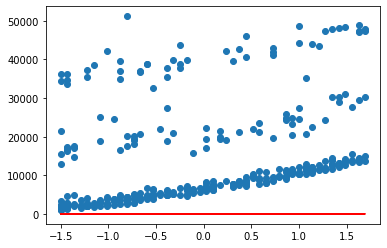

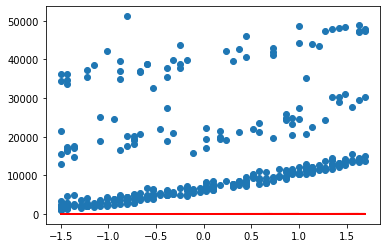

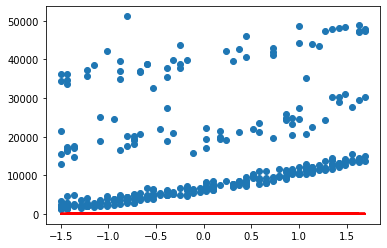

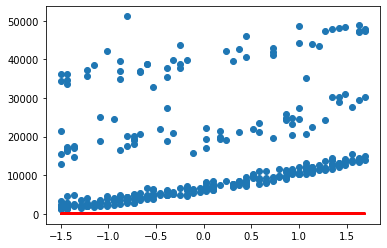

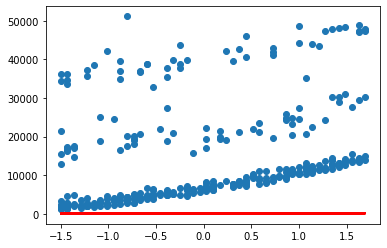

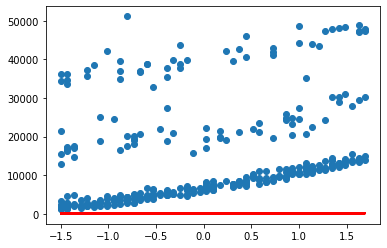

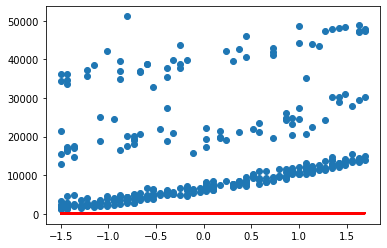

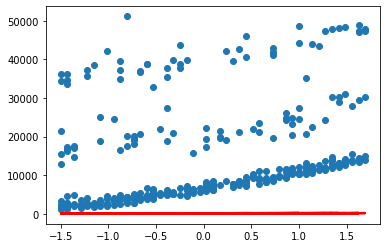

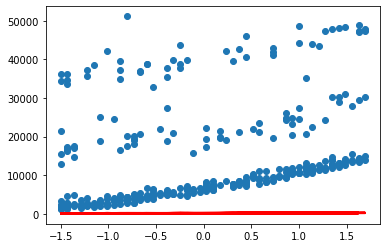

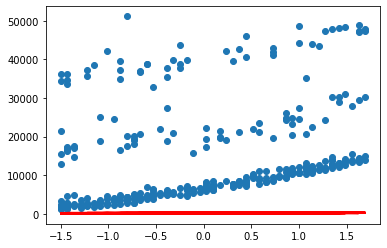

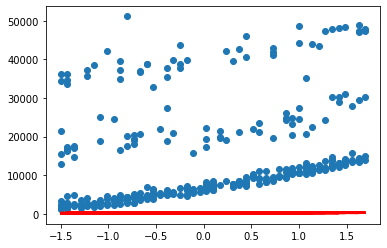

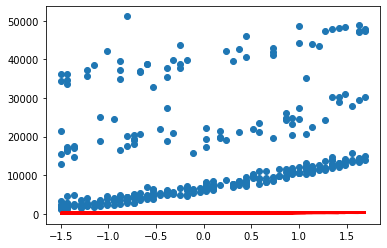

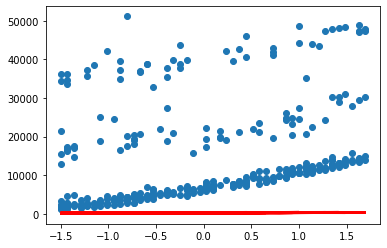

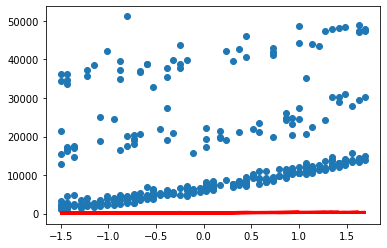

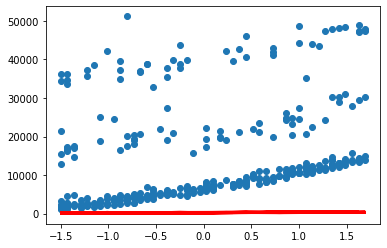

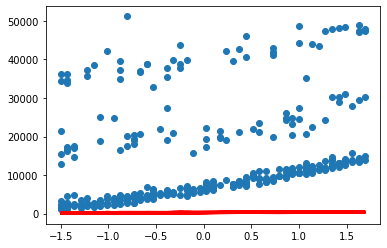

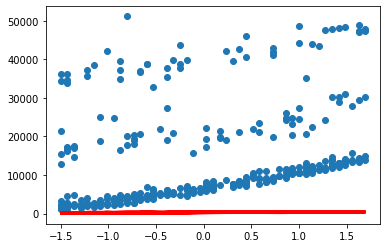

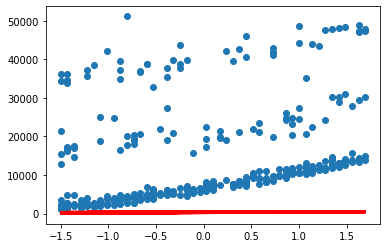

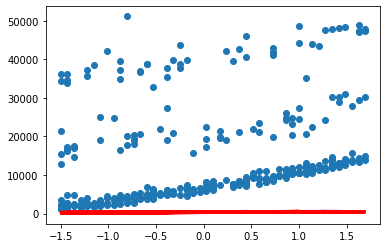

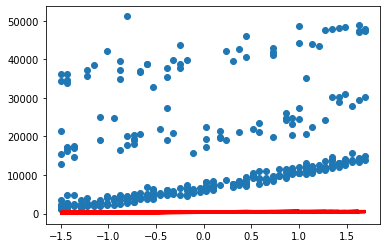

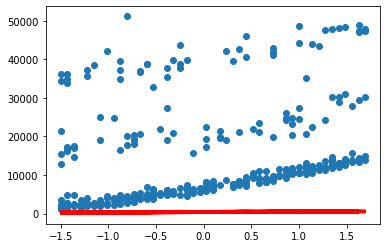

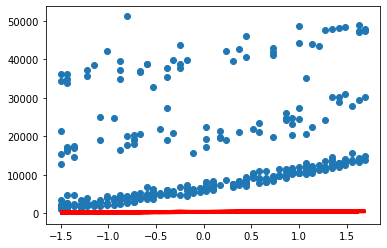

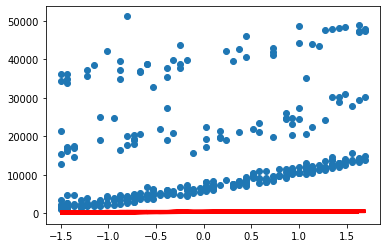

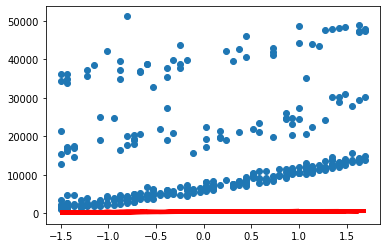

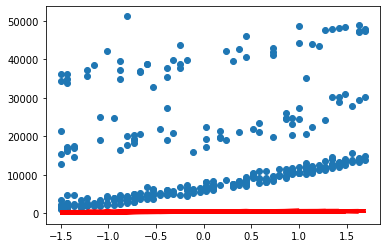

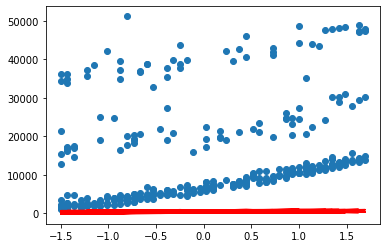

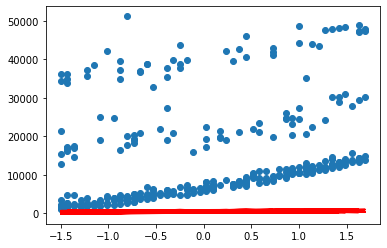

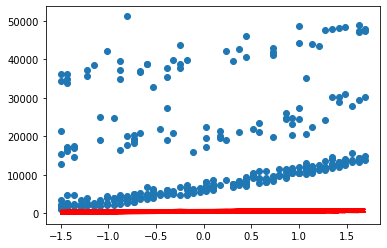

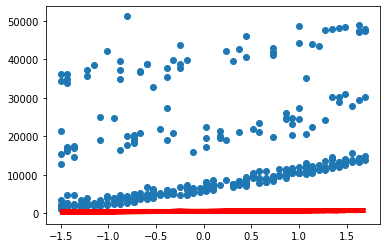

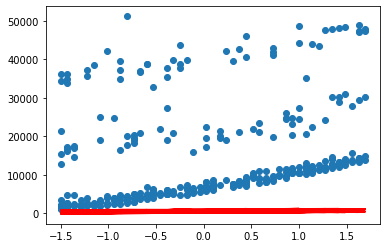

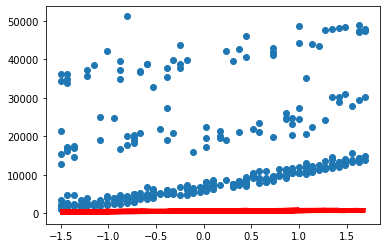

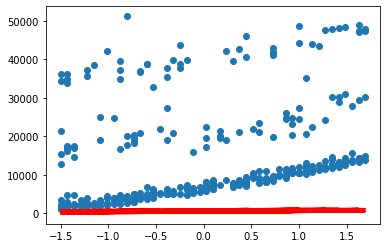

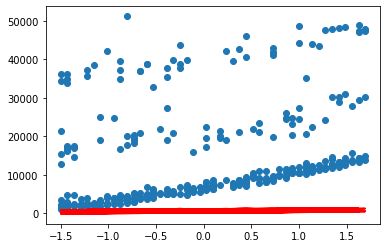

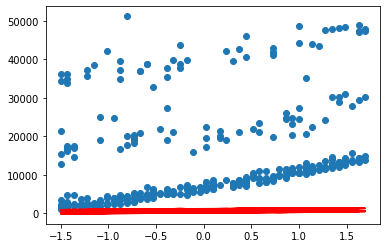

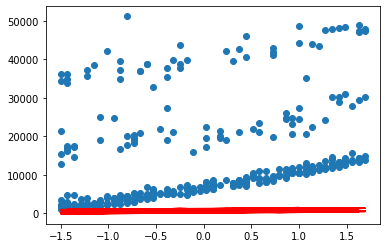

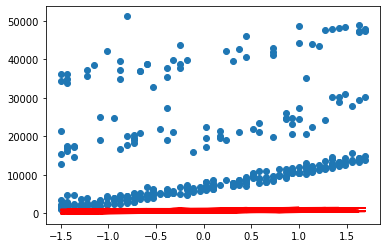

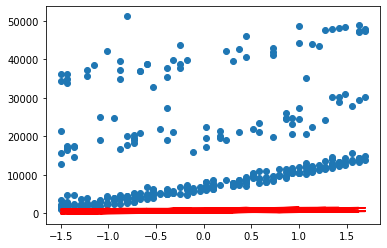

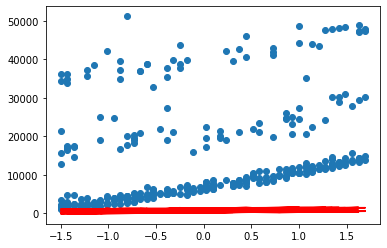

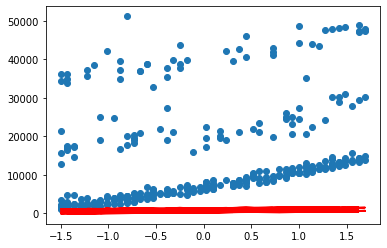

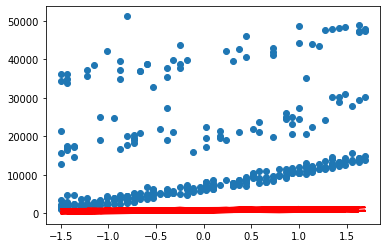

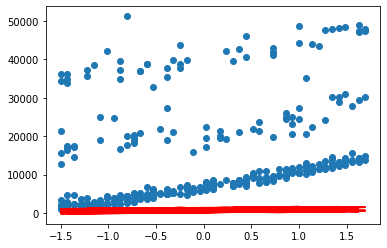

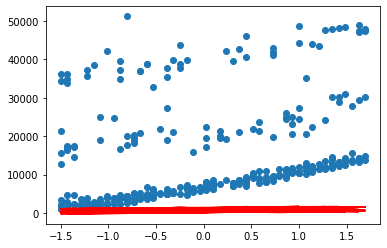

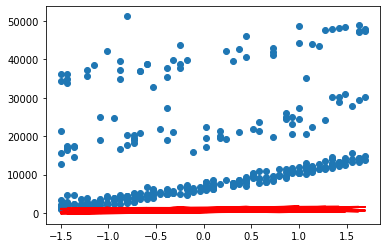

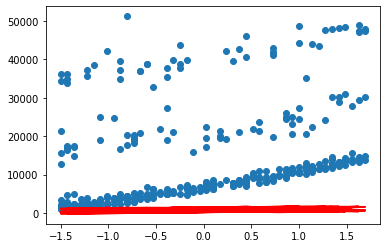

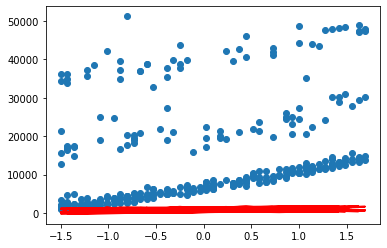

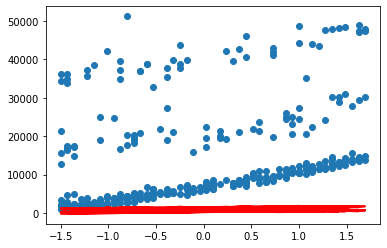

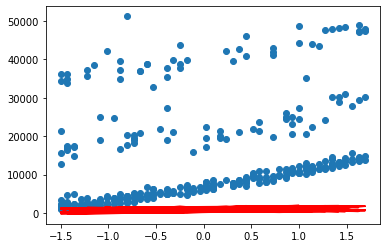

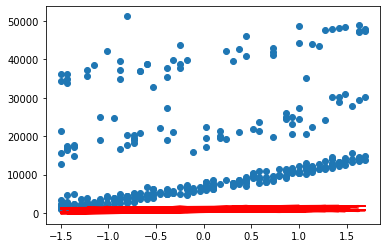

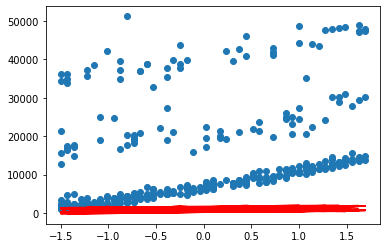

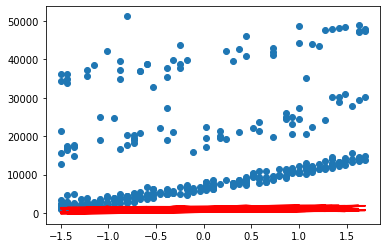

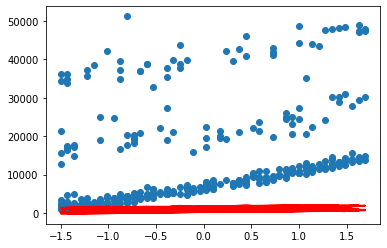

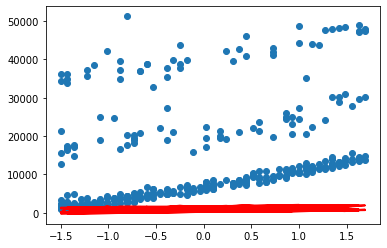

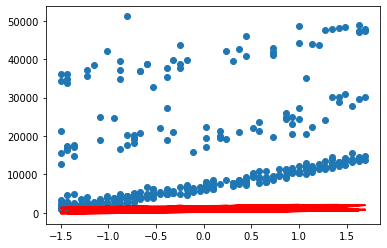

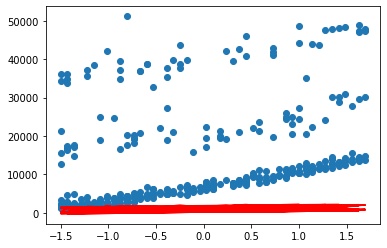

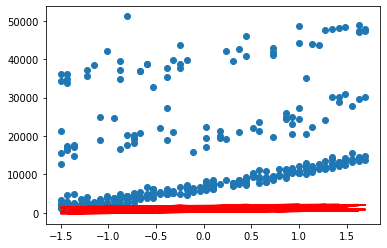

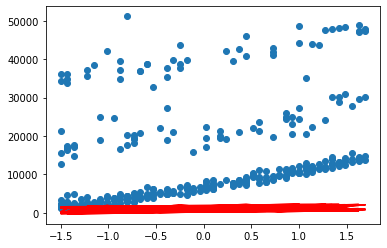

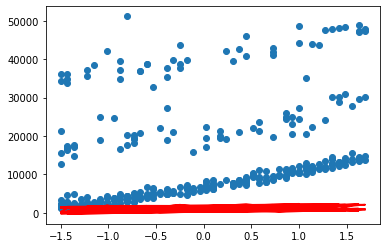

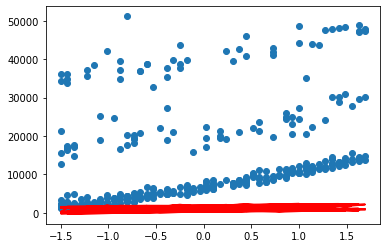

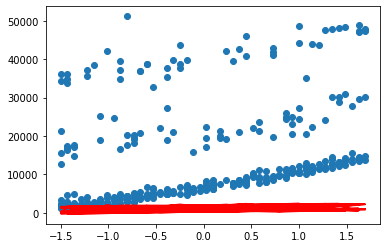

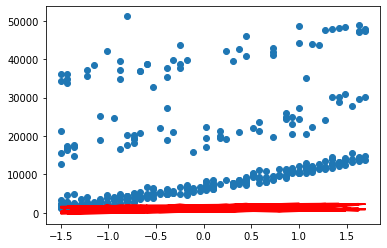

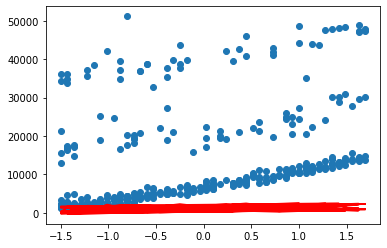

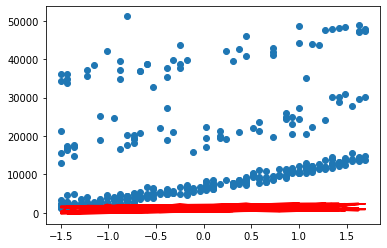

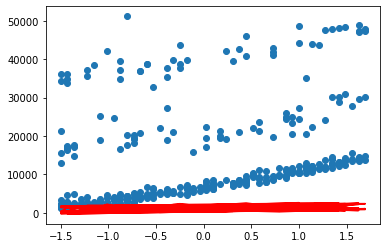

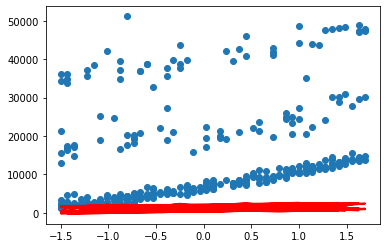

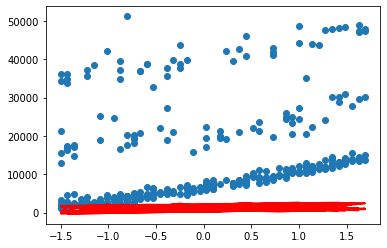

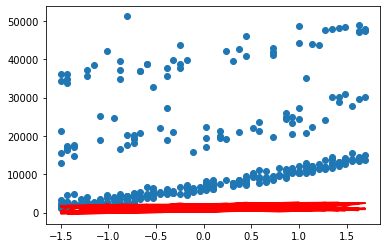

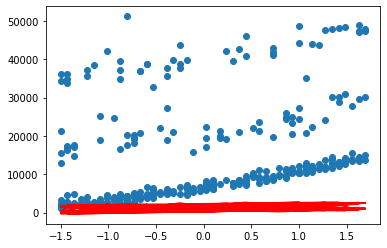

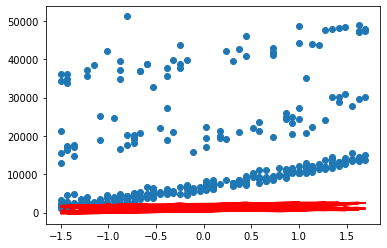

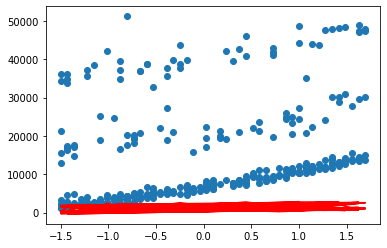

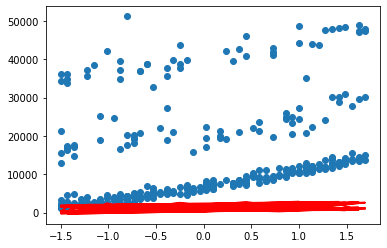

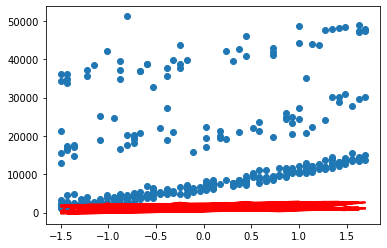

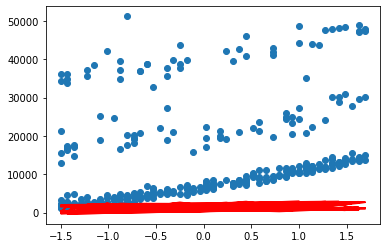

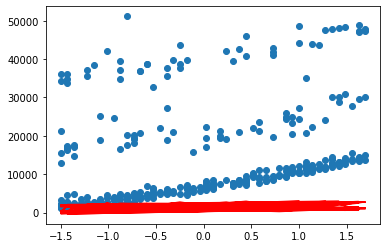

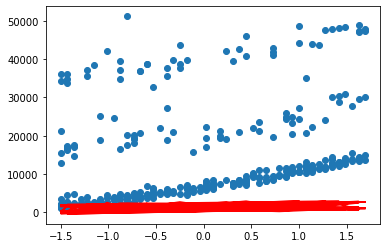

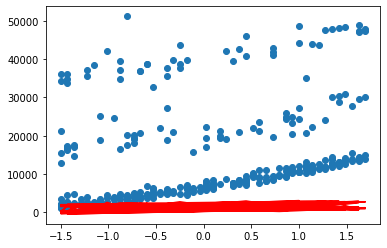

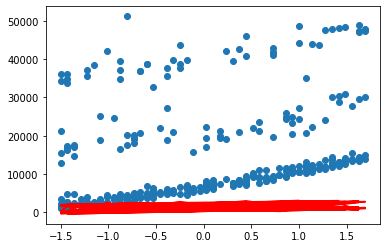

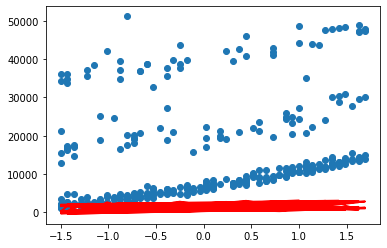

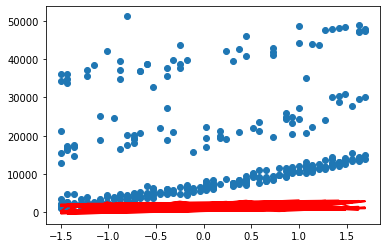

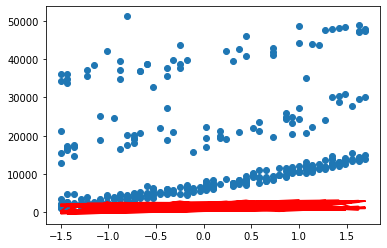

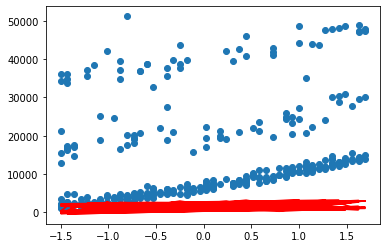

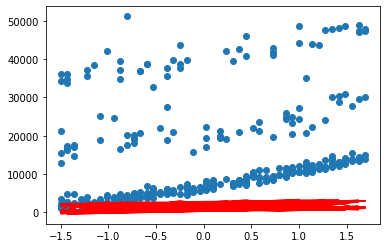

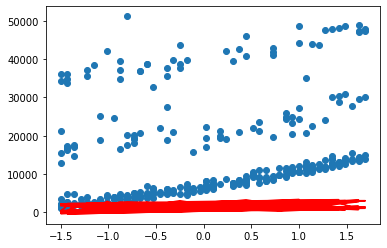

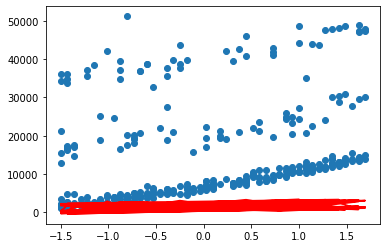

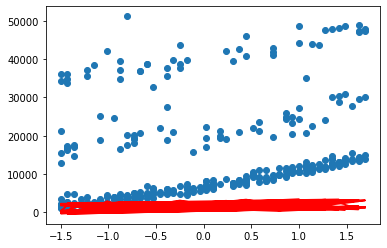

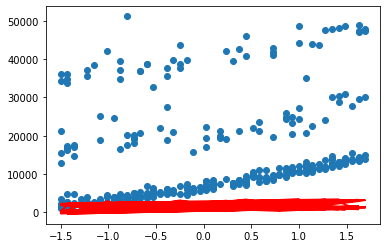

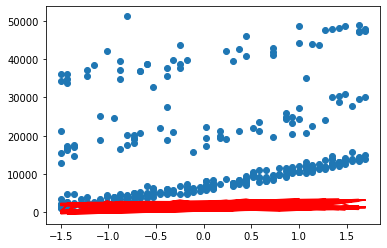

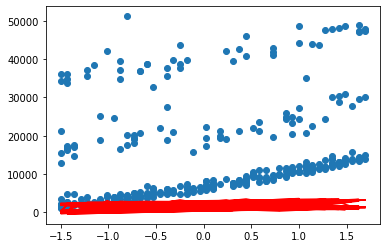

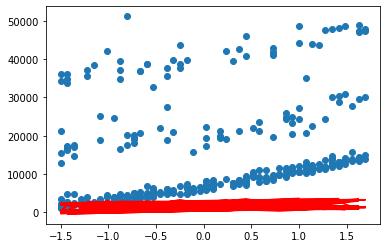

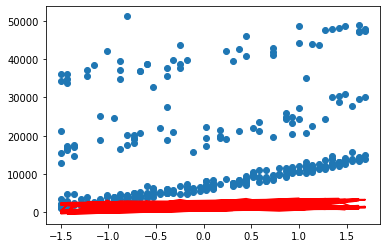

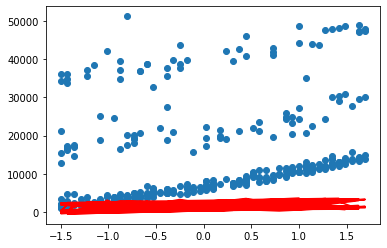

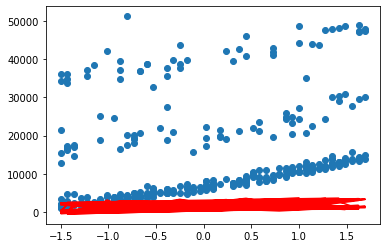

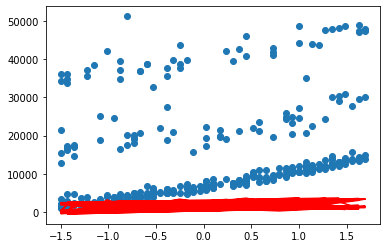

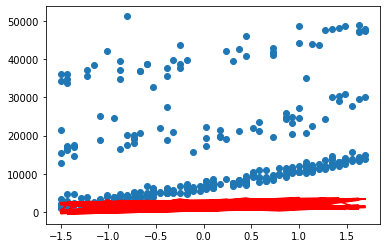

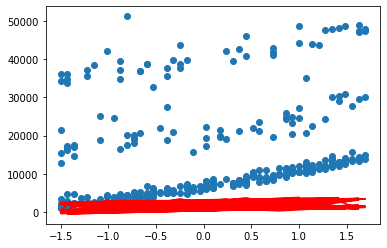

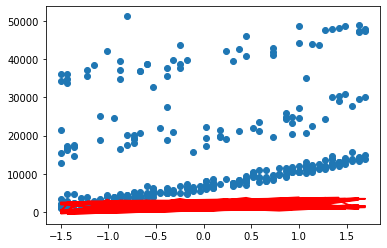

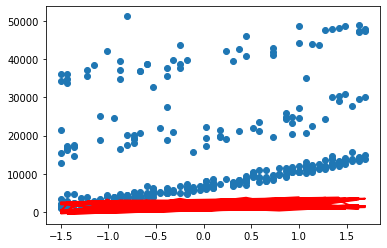

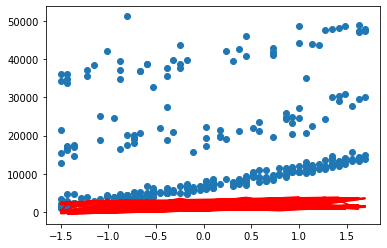

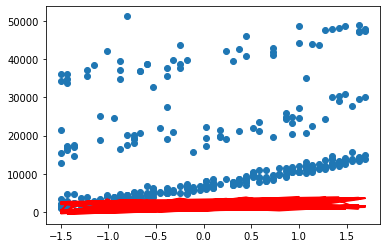

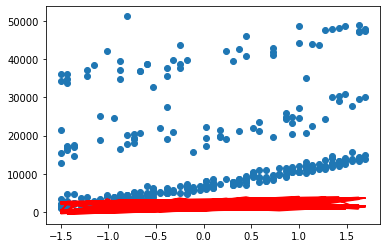

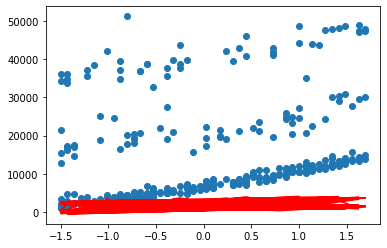

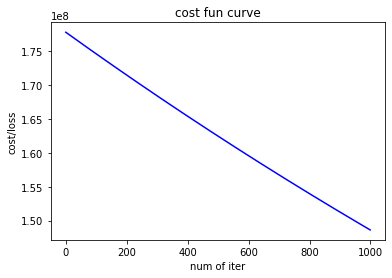

In [ ]:
theta_array1=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.0001,1000)

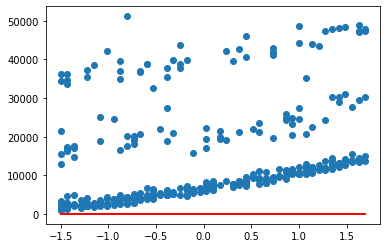

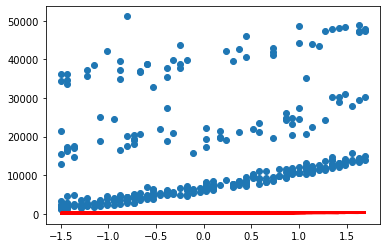

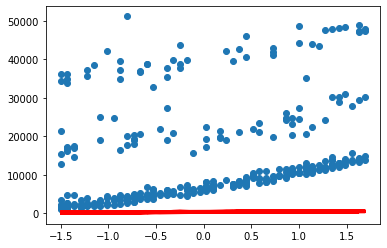

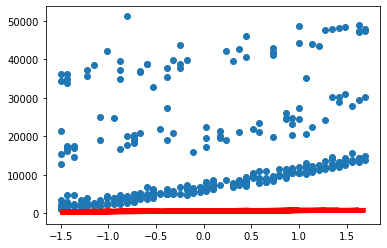

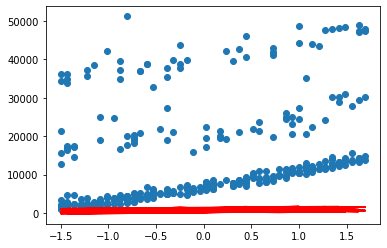

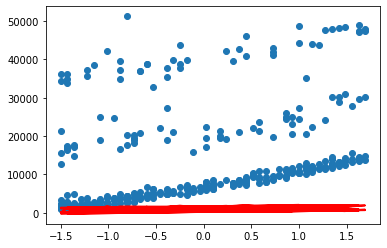

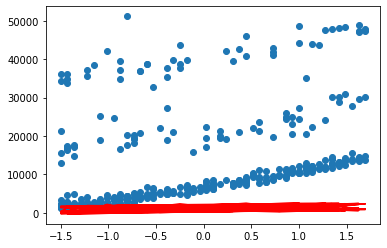

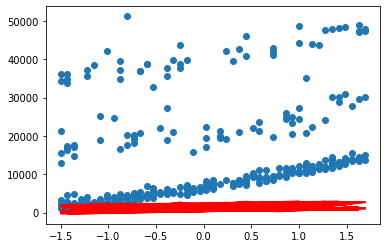

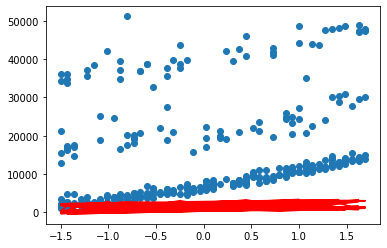

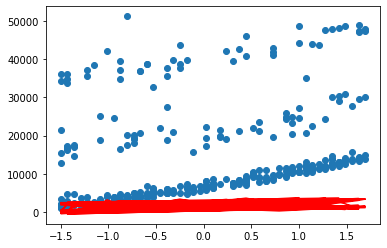

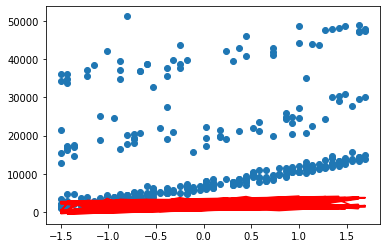

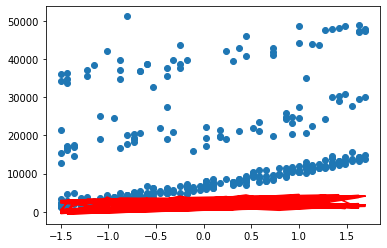

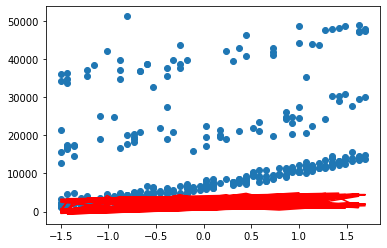

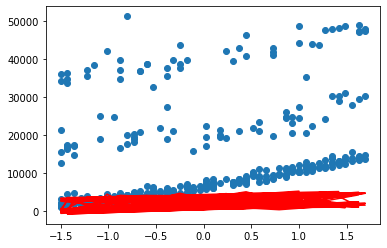

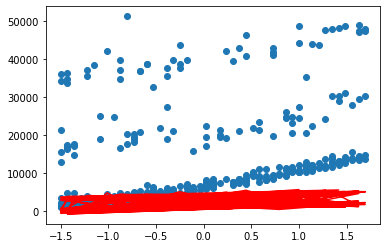

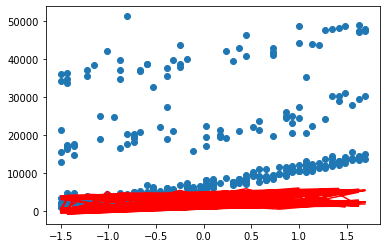

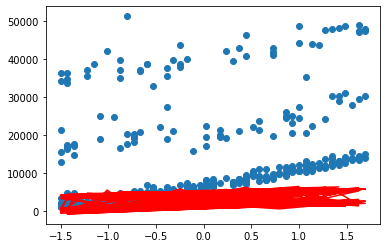

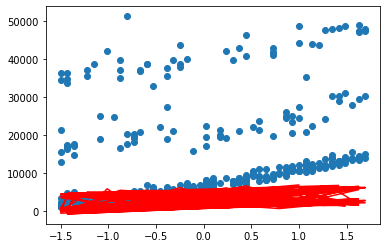

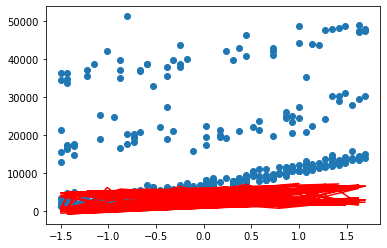

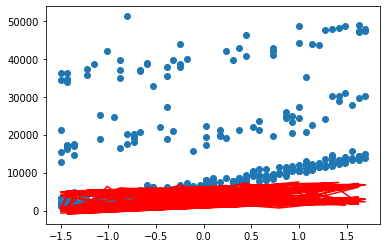

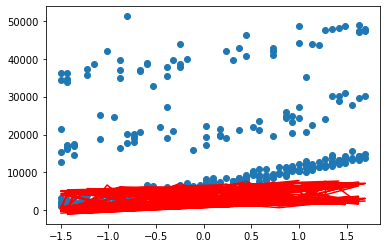

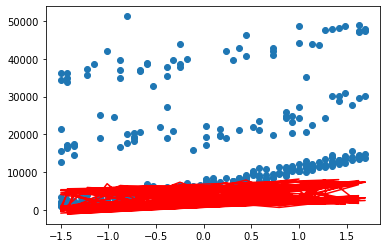

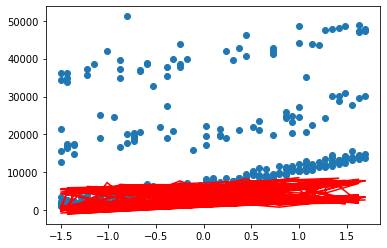

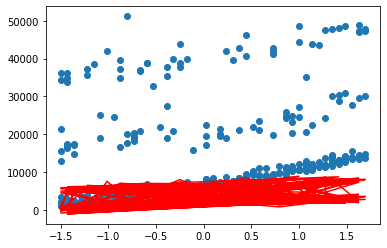

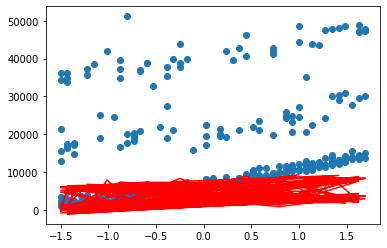

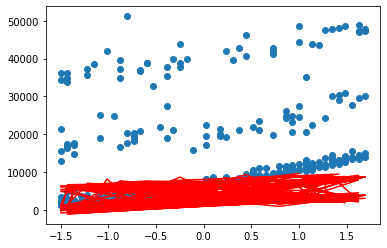

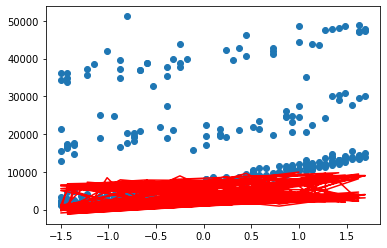

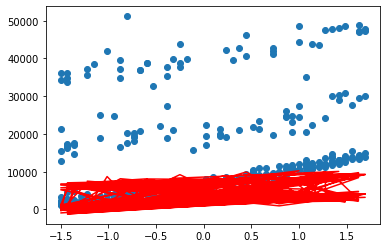

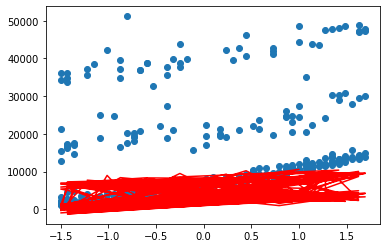

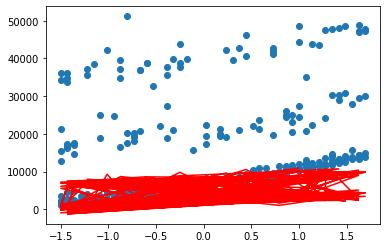

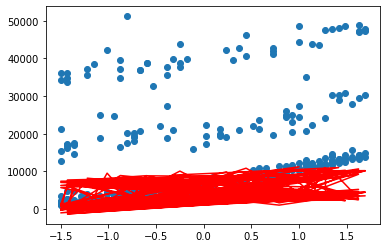

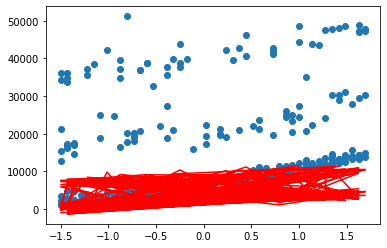

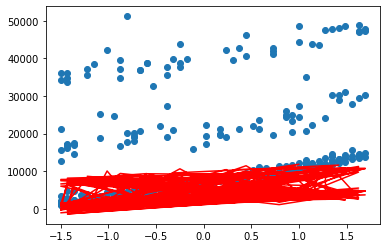

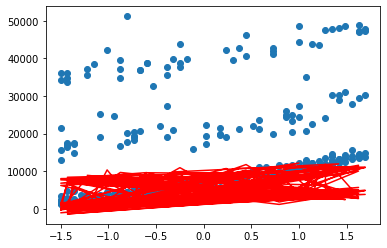

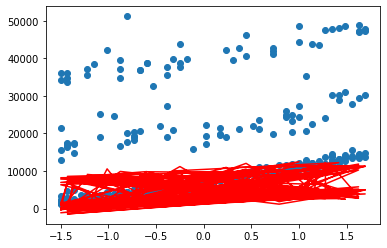

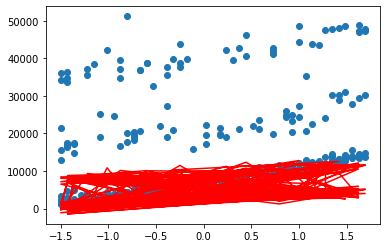

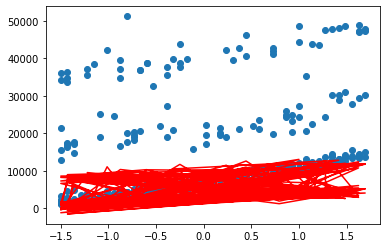

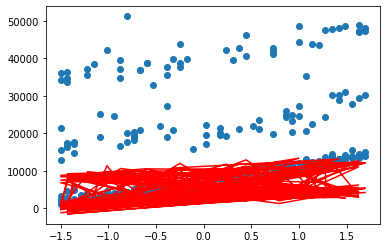

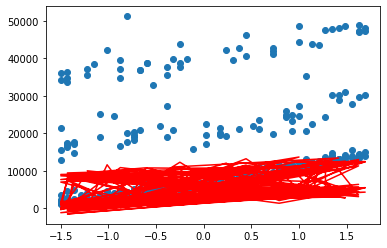

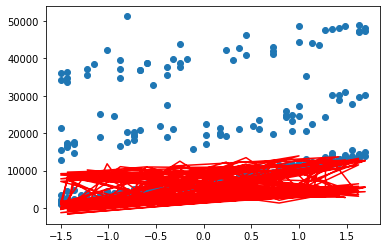

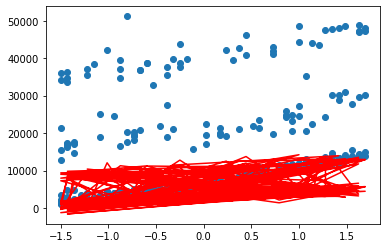

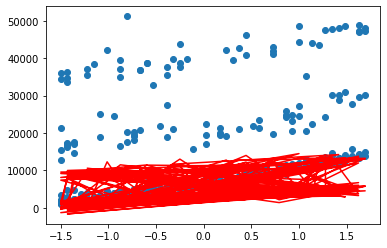

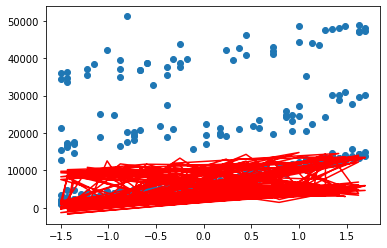

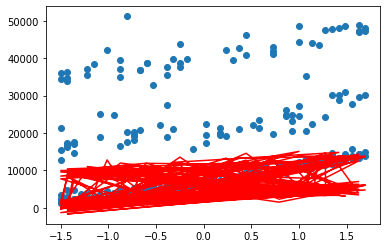

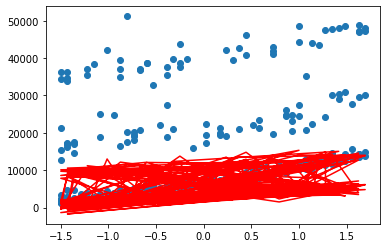

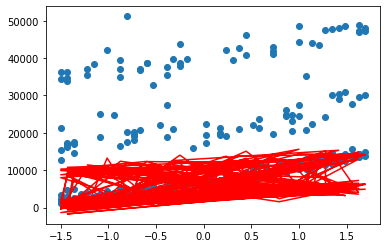

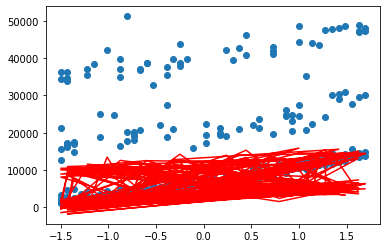

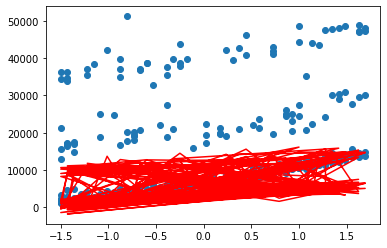

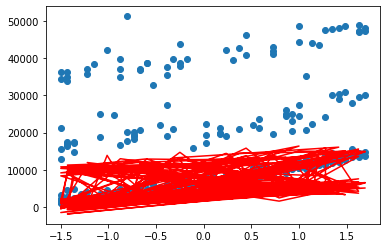

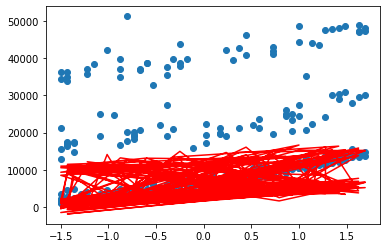

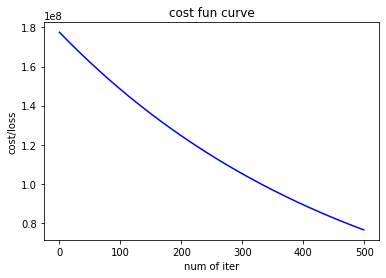

In [ ]:
theta_array2=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.001,500)

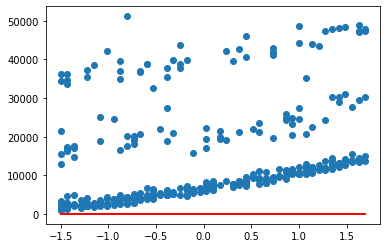

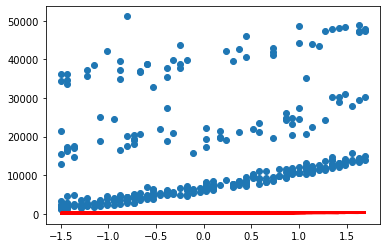

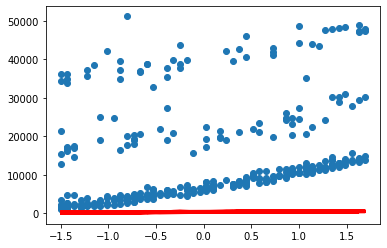

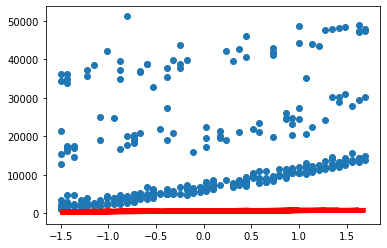

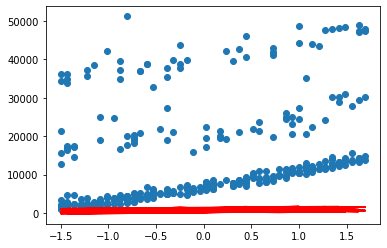

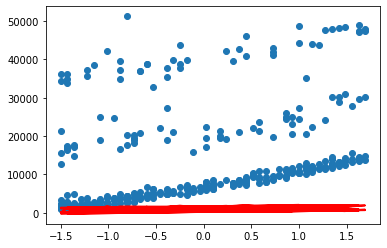

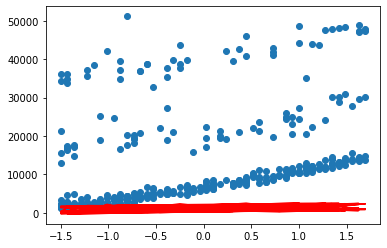

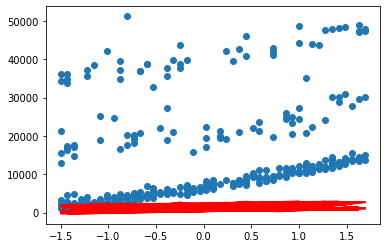

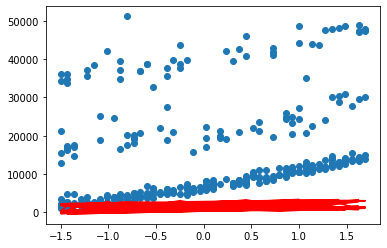

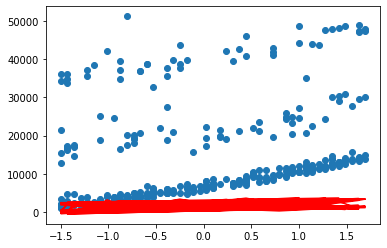

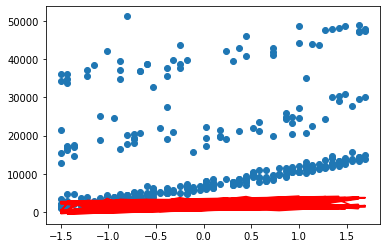

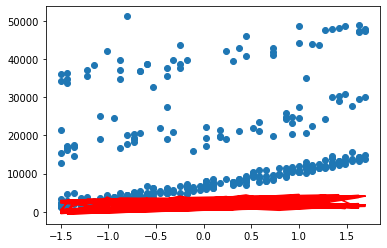

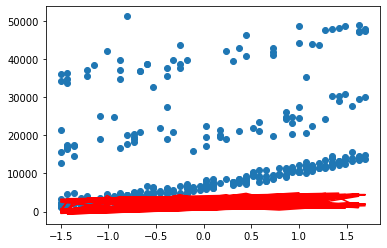

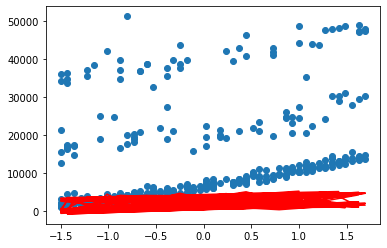

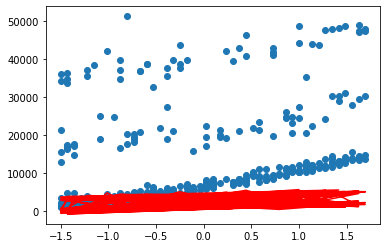

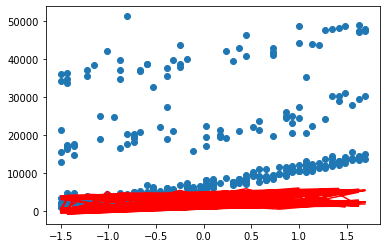

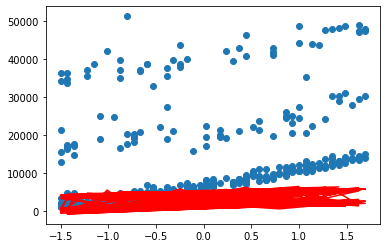

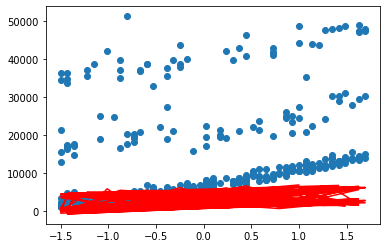

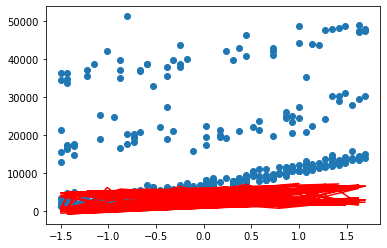

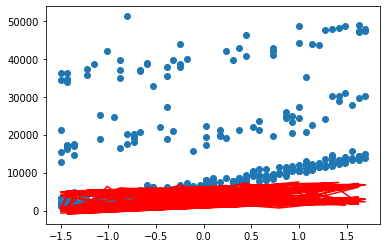

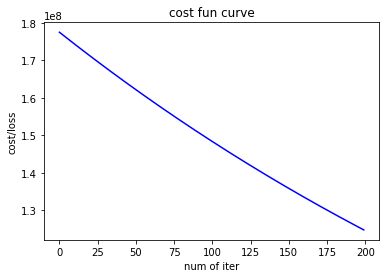

In [ ]:
theta_array3=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.001,200)

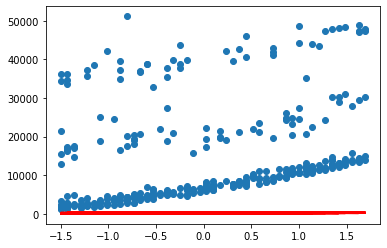

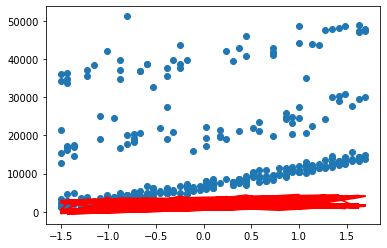

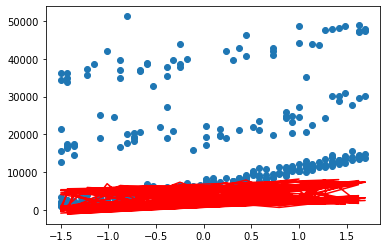

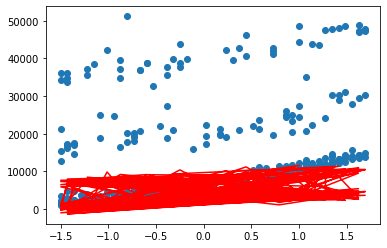

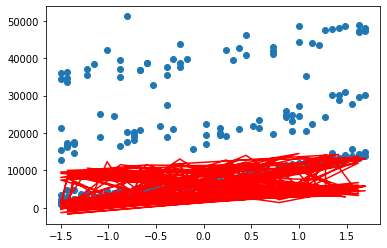

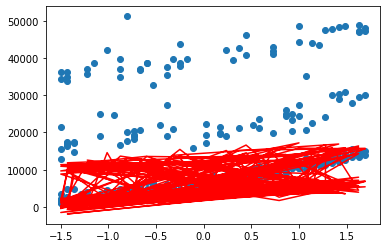

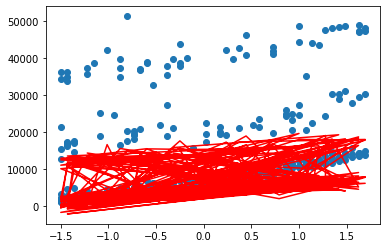

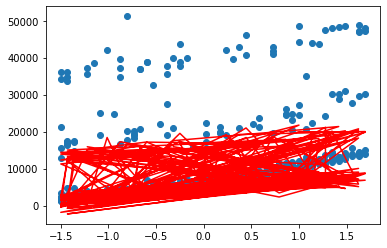

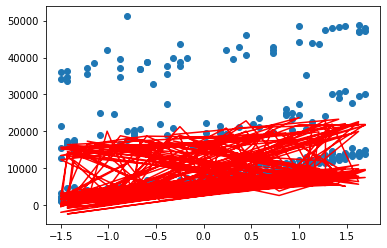

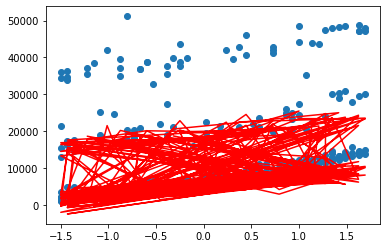

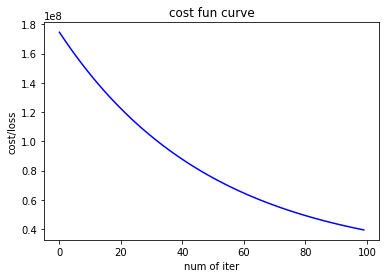

In [ ]:
theta_array4=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.01,100)

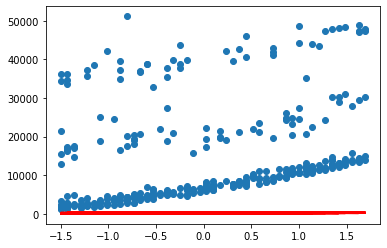

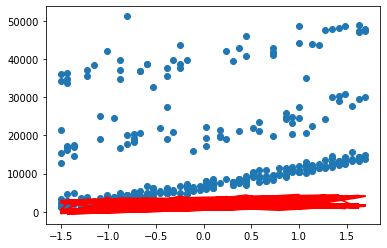

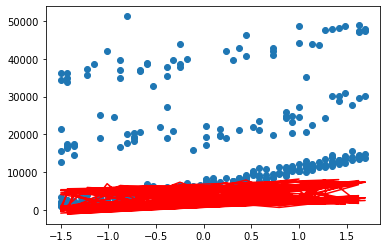

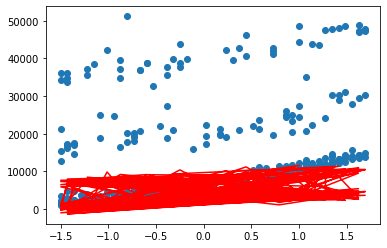

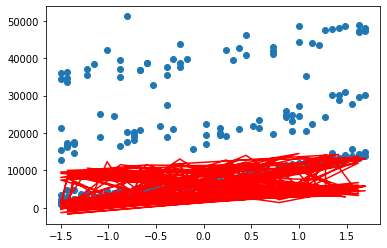

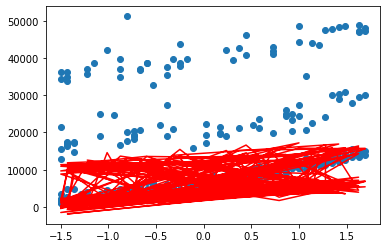

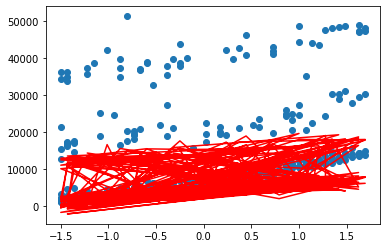

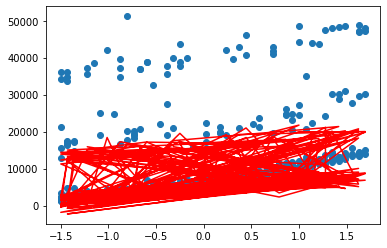

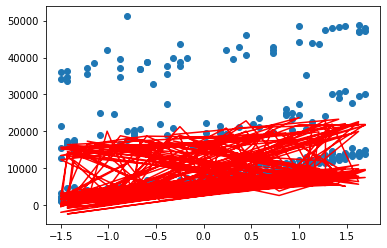

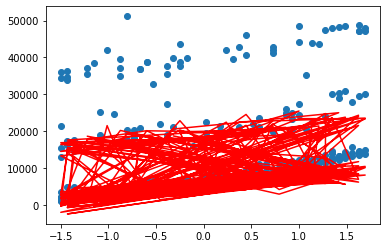

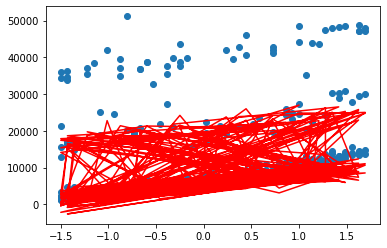

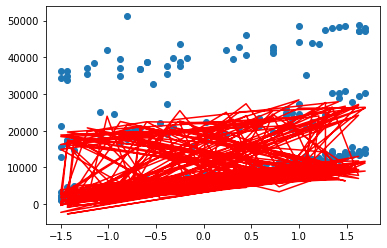

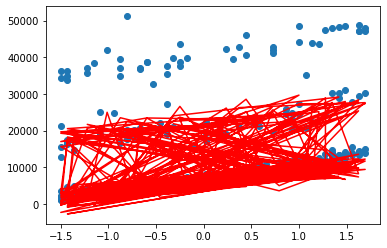

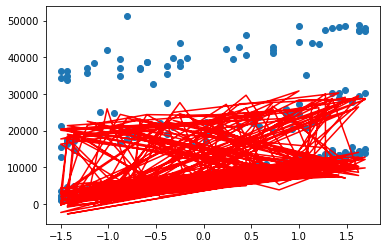

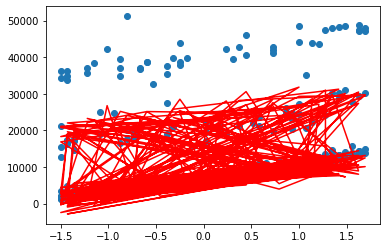

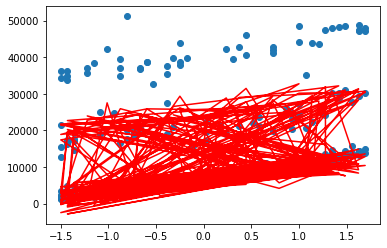

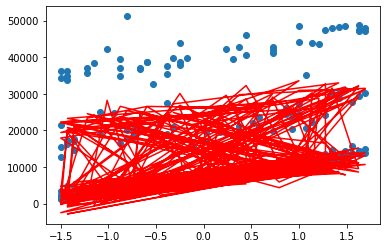

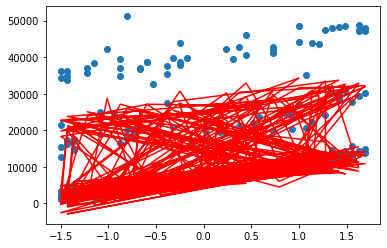

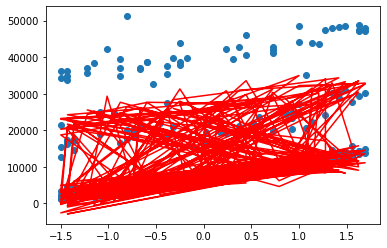

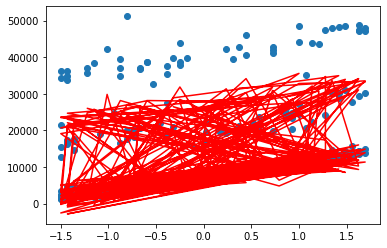

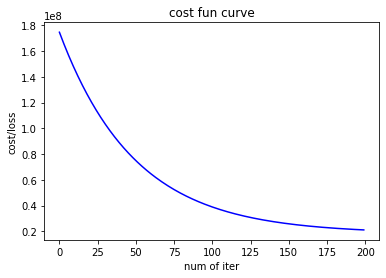

In [ ]:
theta_array5=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.01,200)

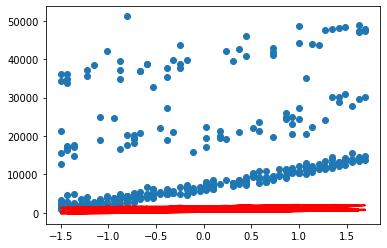

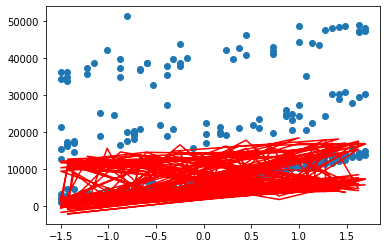

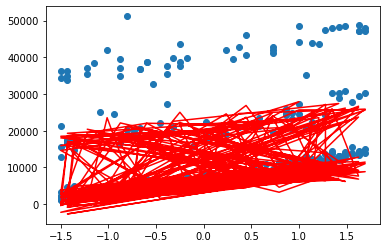

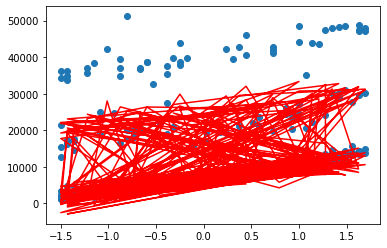

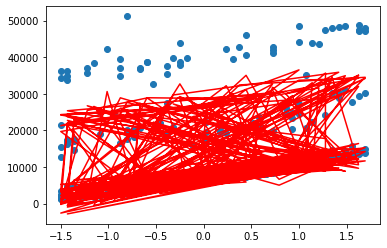

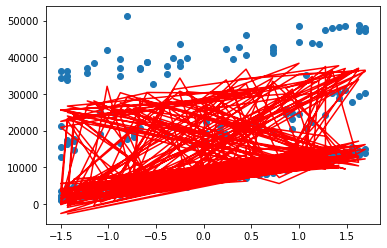

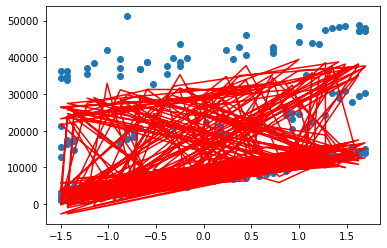

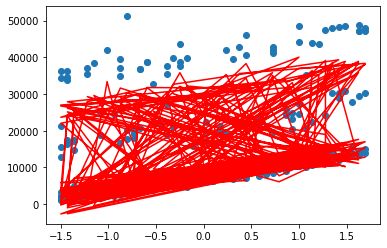

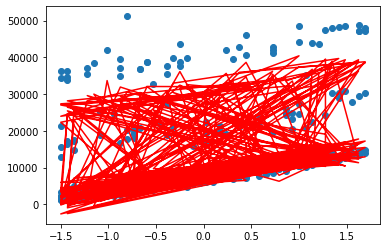

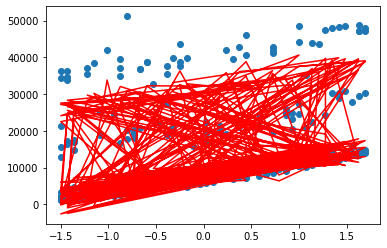

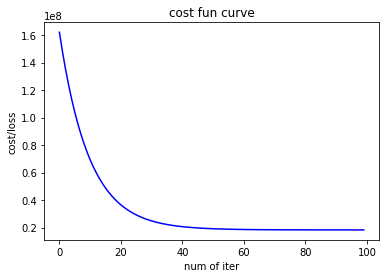

In [ ]:
theta_array6=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.05,100)

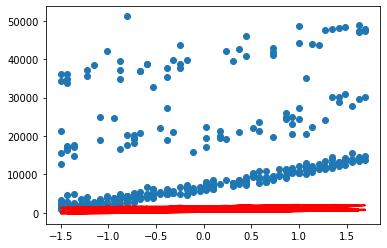

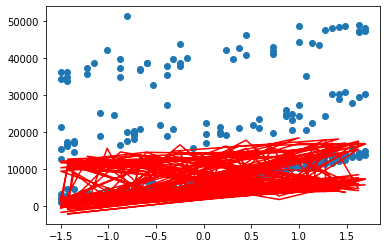

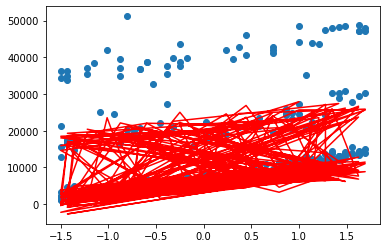

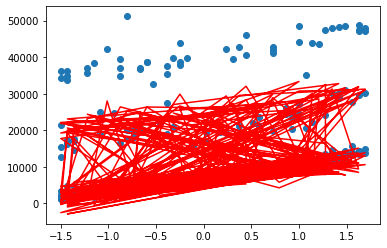

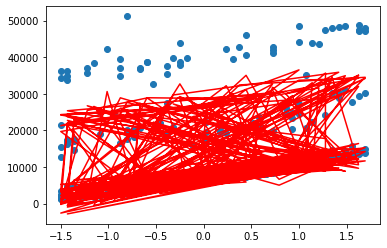

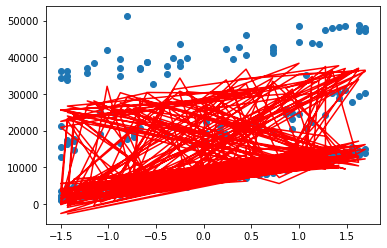

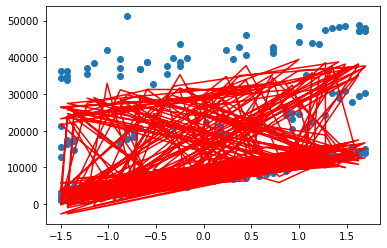

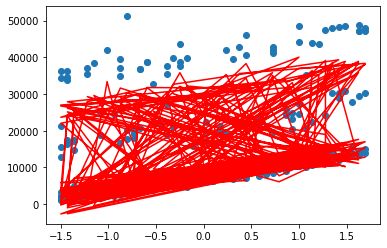

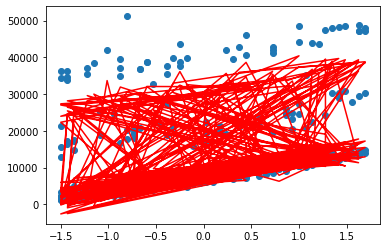

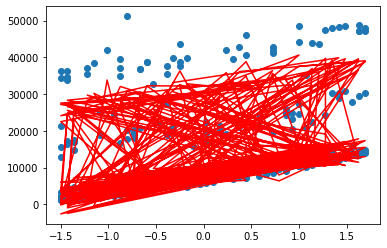

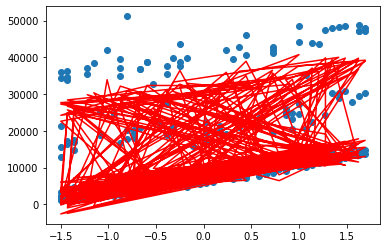

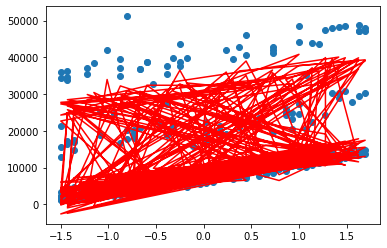

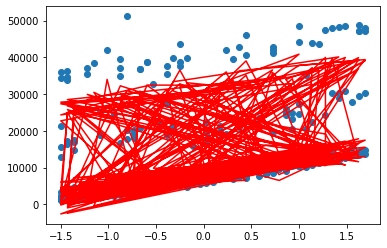

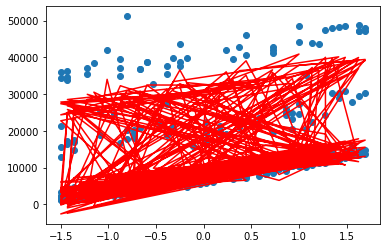

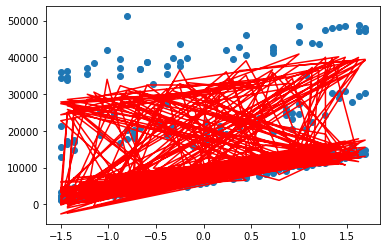

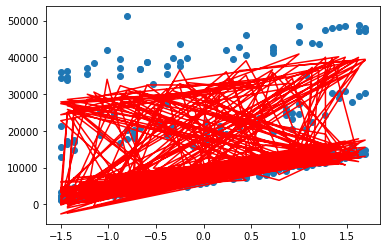

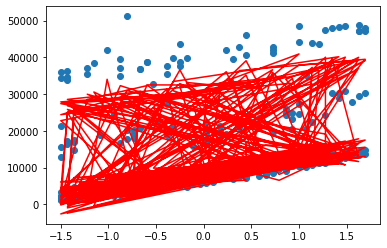

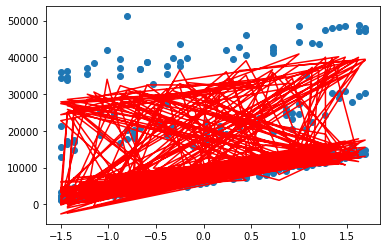

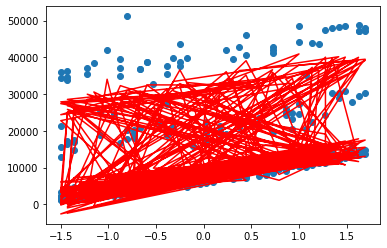

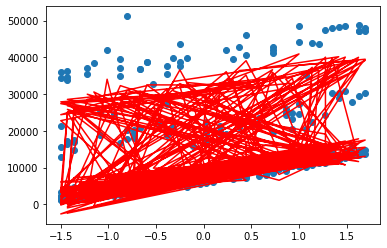

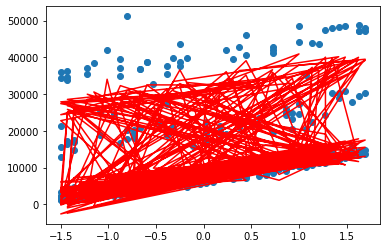

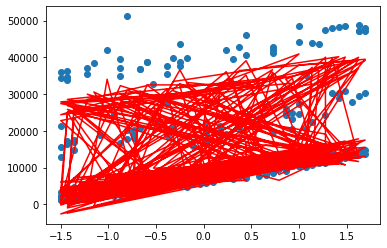

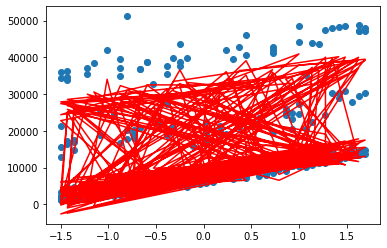

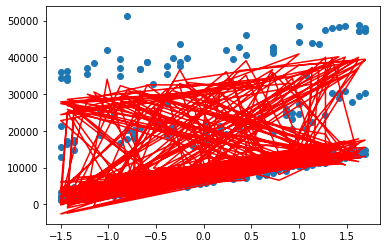

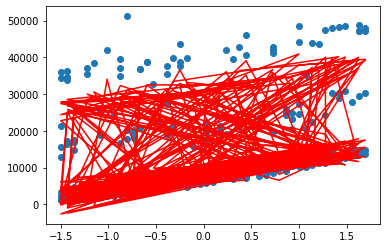

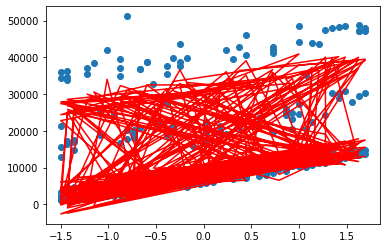

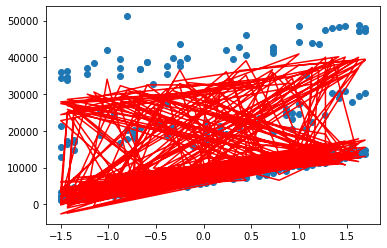

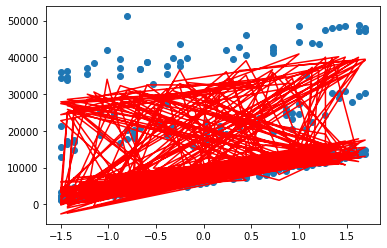

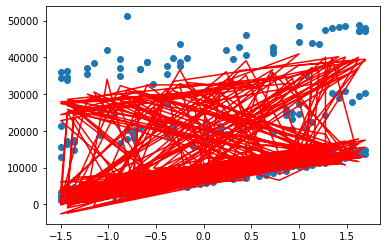

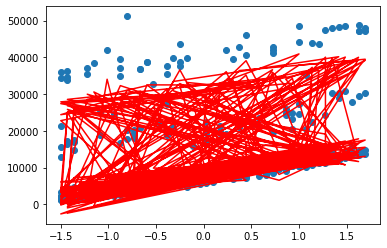

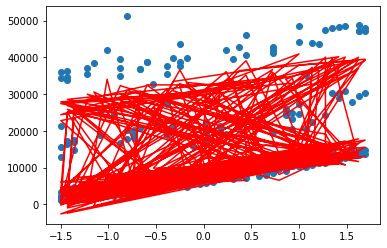

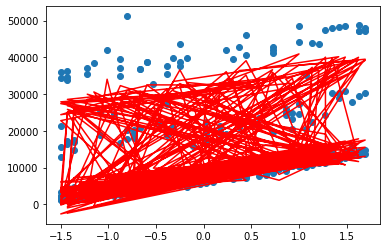

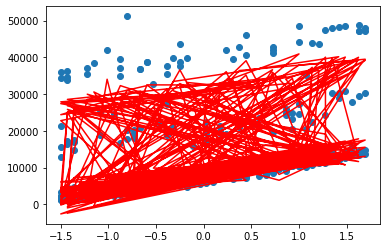

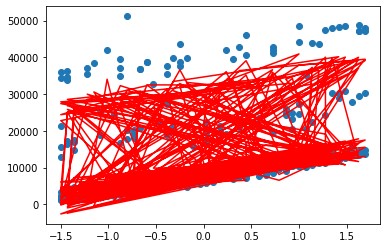

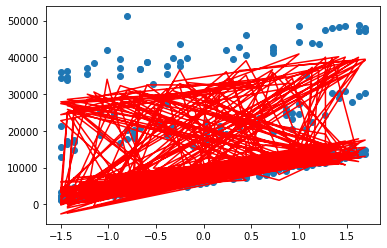

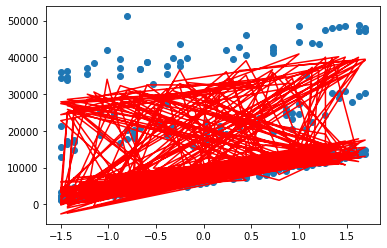

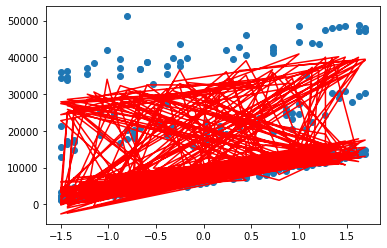

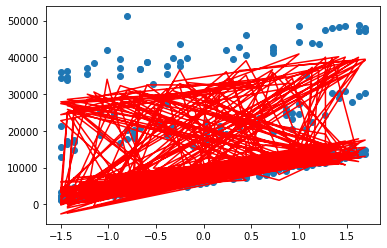

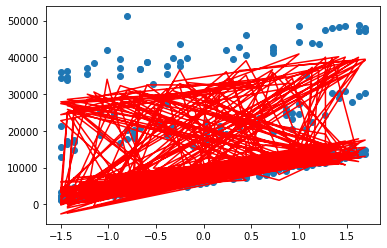

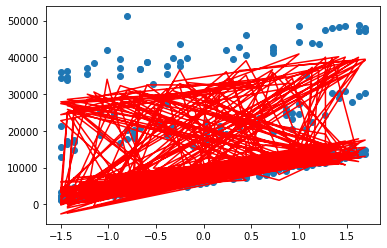

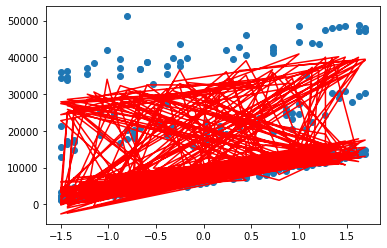

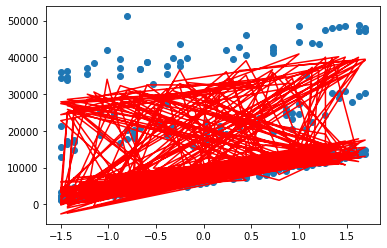

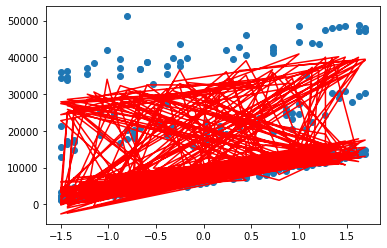

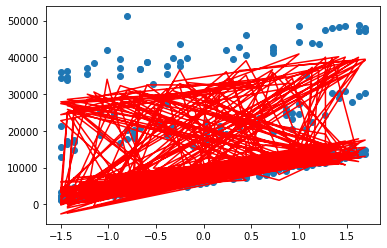

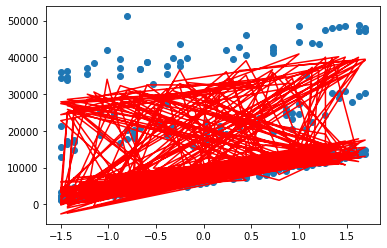

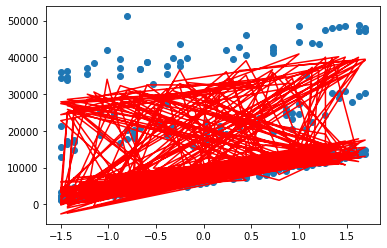

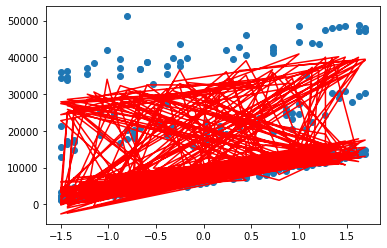

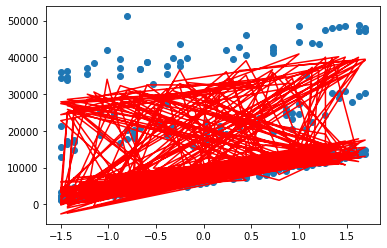

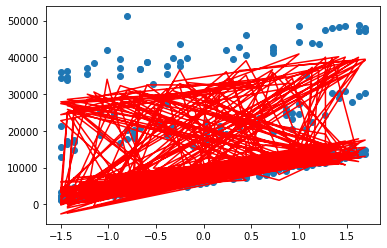

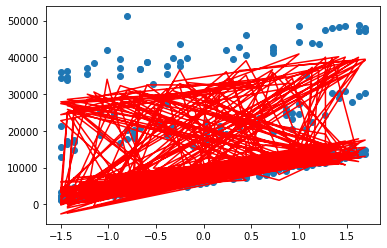

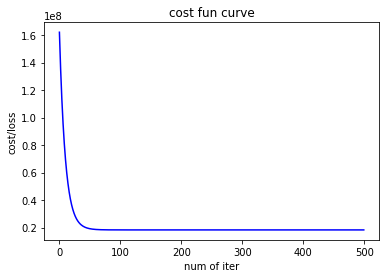

In [ ]:
theta_array7=training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],Y,0.05,500)

In [ ]:
print(theta_array)
print(theta_array1)
print(theta_array2)
print(theta_array3)
print(theta_array4)
print(theta_array5)
print(theta_array6)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array([1333.90273298]), array([380.4082296]), array([112.732069]), array([248.78092639]), array([82.35289264]), array([958.26356517]), array([0.95910272])]
[array([5517.16050683]), array([1561.56937989]), array([388.29042604]), array([976.3343509]), array([322.40694083]), array([3952.75720454]), array([-9.68524175])]
[array([2541.89531481]), array([723.47348559]), array([205.42275457]), array([467.6892146]), array([154.69978795]), array([1824.63527576]), array([0.17737964])]
[array([8885.96096086]), array([2495.35142346]), array([493.36806892]), array([1485.16807804]), array([489.96868258]), array([6354.21824645]), array([-38.54372727])]
[array([12138.51005583]), array([3370.22215444]), array([410.2822721]), array([1860.44987966]), array([615.70059749]), array([8674.97682693]), array([-98.12464757])]
[array([13933.44163184]), array([3821.60468326]), array([141.00498794]), array([1942.09951733]), array([652.21738772]), array([9999.27621899]), 

In [ ]:
col = np.array([np.ones(len(X_norm))]) 
X = np.hstack((np.atleast_2d(col).T, X_norm ))

In [ ]:
eqn = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)         #normal equation formula
print(eqn)
print(theta_array7)

[[14016.42629328]
 [ 3837.81712577]
 [   98.47043536]
 [ 1933.28329109]
 [  651.82056636]
 [10075.29833712]
 [ -178.91365953]]
[array([14016.42629317]), array([3837.81712766]), array([98.47043828]), array([1933.28328977]), array([651.82056683]), array([10075.29833478]), array([-178.91365752])]


Conclusion:
    From above example we can say that the in gradient method we can find min cost but it take more time as it uses iterations and while using normal equation we can find min cost faster than the gradient descent method.